# CS 237 Lab Four: Simulating Random Variables
In this lab we will explore the notion of random variables, which will be a very important topic for the next few weeks. We will think about creating random variables for certain characteristic frequency distributions corresponding to the various canonical problems (such as flipping a coin until a heads appears), and then explore the notion of expected value and the best strategy for a game. 

In [30]:
# Here are some imports which will be used in code that we write for CS 237

# Jupyter notebook specific 

from IPython.display import Image
from IPython.core.display import HTML 
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML   

# Imports potentially used for this lab

import numpy as np                # arrays and functions which operate on array
from numpy import linspace, arange
import matplotlib.pyplot as plt   # normal plotting
import seaborn as sns             # Fancy plotting 
import pandas as pd               # Data input and manipulation

from numpy.random import random, randint, uniform, choice, shuffle
from collections import Counter

%matplotlib inline


## Problem One: Generating Random Floating-Point Numbers in [0..1)
In this problem we will investigate how to implement the <code>function numpy.random.random()</code>, which generates random 32-bit floating-point numbers in the range [0..1). Essentially, this is a random variable implemented in Python. This will form the basis for a variety of similar random variables representing other canonical problems, such as flipping coins. 

<b>Hash functions</b> 
As you may recall from CS 112, hash functions map key values to buckets in a hash table: the hash function appears to be spreading the keys uniformly randomly over the buckets, but in fact there is nothing random about it, since we can easily repeat the computation to find the key later. This is called pseudo-random behavior: the hash function is not random, but appears to be so unless you know the rule used to compute the hash function. 

The simplest hash functions use the linear-congruential method, which you may remember from CS 112; using prime numbers as multiplier and modulus are a good way to simulate random behavior:

In [31]:
A = 492876847     # the 26 millionth prime
M = 982451653     # the 50 millionth prime   

def hash(x):
    return (A * x) % M

# Test it!
X = [231,45,123,87,133,123]
for x in X:
    print(hash(x))

872611562
565521749
694301348
634864610
710811553
694301348


### Part (A): Pseudo-random number generation (done for you!).
However, we want to generate a series of numbers which appear to be uniformly randomly distributed over the range [0 .. M), and so we will start with a seed value and successively apply the hash function to generate a series of pseudo-random numbers $n_0$, $n_1$, $n_2$, etc.

<blockquote>

$n_0 = \text{hash(seed)}$<br>

$n_2 = \text{hash(hash(seed))}$<br>

...<br>

$n_k = \text{hash}^{k+1}\text{(seed)}$
</blockquote>
NOTE: You should NOT put this in a loop and apply the hash function $k$ times the $k^{th}$ time you call the function, but store the previous value in a global variable and apply the hash function ONCE each time the function is called. 

In [32]:
seed = 15485863    # The millionth prime

def next_random():
    return 0                  # your code here

# Test it
for x in range(10):
    print(next_random())    

0
0
0
0
0
0
0
0
0
0


###  Part (B): Pseudo-random Floats.
Now convert this into a random variable which produces floating-point values in the range [0..1). 

In [33]:
def next_uniform():
    return 0           # your code here      

# Test it!
for x in range(0,10):
    print(next_uniform())

0
0
0
0
0
0
0
0
0
0


###  Part (C) Testing for Randomness: The Spectral Test.

For this part, we would like you to simply repeat the spectral test from Lab 01 which
tests that the values are distributed equinumerously over the range.

Convert these floating-point numbers into integers in the range [0, ..., 100) by multiplying by 100 and then converting to an int (which will truncate the fractional part). If we histogram a sequence of 1 million such values, we should get an approximately equinumerous distribution over the range [0, .., 100). 

In [34]:
num_trials = 10**6

# your code here

## Problem Two (A): Generating Random Integers in a Range [a, ..., b)
Now we will investigate generating random integers in a specific range, from a (inclusive) to b (exclusive, as usual in ranges in Python); this is
equivalent to the numpy.random function <code>randint(a,b)</code>; the random variable looks like this:

    S = { a,       a+1,     ...., b-1 }
    P = { 1/(b-a), 1/(b-a), ...., 1/(b-a) }
    


In [35]:
# To convert a float [0..1) into [a, ..., b),
# First, convert float [0..1) into [0 .. (b-a))
# Next, convert into float [a .. b)
# Finally, convert to ints. 

def next_rand_int(a,b):
    return 0           # your code here 

# Test it!
for k in range(10):
    print(next_rand_int(0,10))

0
0
0
0
0
0
0
0
0
0


In [36]:
# your code here 

# Test this by running this cell several times!

###  Part (B): Sampling without replacement
In this problem we will create our own version of the numpy choice function, which we used extensively in Lab Three. There are two steps: first create a function shuffle(...) which takes a list and creates a random permutation, and then slice the list to return some number <code>size</code> of elements from the front of the list. It is exactly the same as shuffling a deck and then dealing out a number of cards from the top.

In [37]:
# shuffle a list X by choosing two indices using the function nextRandInt just created
# in part (A) and swapping the two elements at those indices. Repeat this 10 * len(X) times.
# Do NOT destroy the list, but make a copy before shuffling it.

def shuffle(X):
    newX = list(X)
    # your code here
    return newX


# Test it!
X = [1,2,3,4,5,6,7,8,9,10]
for k in range(10):
    print(shuffle(X))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [38]:
# Return a list of length size of elements from the list X; if replace is True, 
# simply select elements from the list using next_rand_int if False, shuffle 
# the list and slice an initial part of the list and return it.

def my_choice(X,replace=False,size=1):
    return []      # Your code here

# Test it!
X = [1,2,3,4,5,6]
for k in range(10):
    print(my_choice(X,replace=True,size=8))
    
print()
for k in range(10):
    print(my_choice(X,replace=False,size=5))

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


## Problem Three (A): Generating the Bernoulli Distribution
In this problem we will investigate how to implement a random variable that simulates the flipping of a (possibly unfair) coin, where the probability of a heads is p, and returning True ("success") if a heads turns up, and False ("failure") if tails; the random variable is thus:

    S = { False, True }
    P = { 1-p,   p }
    

In [39]:
def next_bernoulli(p):
    return False        # Your code here, use next_uniform()

for k in range(10):
    print(next_bernoulli(0.6))

False
False
False
False
False
False
False
False
False
False


In [40]:
num_trials = 10**6

# Your code here to show a histogram for p = 0.6

### Part (B): Generating a Binomial Random Variable
In this problem we will investigate how to implement a random variable that simulates the following problem: Flip a (possibly unfair) coin (where the probability of heads is p) N times -- how many heads appeared? 

We shall generate these random numbers by a simple technique of simulating the flipping of coins, using the solution to the previous problem. 

In [41]:
def next_binomial(N,p):
    return 0              # Your code here

# Test it!
for k in range(10):
    print(next_binomial(5,0.5))

0
0
0
0
0
0
0
0
0
0


In [42]:
num_trials = 10**6

# your code here

## Problem Four: Generating a Geometric Random Variable
In this problem we will investigate how to implement a random variable that 
simulates the following problem: Flip a (possibly unfair) coin (where the 
probability of heads is p) until a head appears -- how many flips did it take?  

The key thing to understand is that if it takes k flips, then it took (k-1) tails (with probability 1-p) and then one head (with probability p):

      S = { 1, 2,       3,           ....   k                 ....  }
      P = { p, (1-p)*p, (1-p)^2 * p, ....   (1-p)^(k-1) * p   ....  } 

We could do a simulation, as in the last problem, but we will explore two new techniques 
for generating random variables, one based on the Cumulative Distribution Function, and 
the other based on an explicit formula for transforming the Uniform distribution for [0..1) into
the random variable we are trying to create. 

###  Part (A) Using the CDF to generate random values

The algorithm for doing this is actually very simple: just generate a random value U in the range [0..1) and when you sum up the values in the CDF, stop when you exceed U. For example, if p = 0.3, then the CDF is as follows:

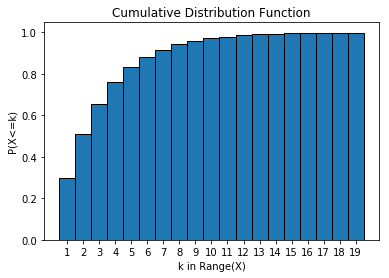

Rng(X) = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
  F(X) = [ 0.3         0.51        0.657       0.7599      0.83193     0.882351
  0.9176457   0.94235199  0.95964639  0.97175248  0.98022673  0.98615871
  0.9903111   0.99321777  0.99525244  0.99667671  0.99767369  0.99837159
  0.99886011]


In [43]:
p = 0.3
X = range(1,20)
probs = [(1-p)**(k-1)*p for k in X]
cum_probs = np.zeros(len(probs))
for i in range(len(probs)):
    for j in range(i+1):
        cum_probs[i] += probs[j]

plt.bar(X,cum_probs, tick_label=X,width=1.0,edgecolor='black')
plt.title('Cumulative Distribution Function')
plt.ylabel("P(X<=k)")
plt.xlabel("k in Range(X)")
plt.show()
print("Rng(X) = " + str(list(X)))
print("  F(X) = " + str(cum_probs))

Therefore, your algorithm would simply generate a random value U in [0..1) and
simply add f(1), f(2), f(3), etc. until exceeding the value of U.

In [44]:

def next_geometric(p):
    return 0           # your code here

# Test it
for k in range(10):
    print(next_geometric(0.3))

    

0
0
0
0
0
0
0
0
0
0


In [45]:
num_trials = 10**6

# your code here

###  Part (B) Using an explicit formula to generate random values

In the previous problems we considered generating random numbers by simulation and by the inverting the CDF.  Now we will explore using an explicit function for the inverse of the CDF. The following formula is described in the literature: if U is a value uniformly-distributed in the range [0..1), then

          1 + floor[ log( U )  /  log( 1 - p )  ]           # log is to the base e
          
is an integer which is distributed according to the Geometric Distribution with probability p.

In [46]:
def next_geometric2(p):
    return 0    # Your code here

# Test it!
for k in range(10):
    print( next_geometric2(0.3) )

0
0
0
0
0
0
0
0
0
0


In [48]:
num_trials = 10**6

# your code here
